<a href="https://colab.research.google.com/github/hackothaurus/Analysis-of-Simple-Linear-Regression/blob/main/csa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Authentication and Data

In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [5]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import files

In [8]:
data = pd.read_csv('drive/FYP - climate smart agriculture/data/data_manipulated/climdata.csv')

In [9]:
data.head()

,Year,Rain_Year_avg,Rain_Year_max,Rain_Year_min,Rain_Summer_avg,Rain_Summer_max,Rain_Summer_min,Rain_Winter_avg,Rain_Winter_max,Rain_Winter_min,Rain_rainfall_variance,Year_avg,Year_max,Year_min,Summer_avg,Summer_max,Summer_min,Winter_avg,Winter_max,Winter_min,temp_variance,wheat_area_harvested,wheat_yield,wheat_production
0,1901,20.694421,68.0930,0.21419,32.519300,68.0930,12.88130,18.667863,68.0930,12.88130,494.245931,20.060848,29.3811,7.72768,28.864000,29.3811,27.9718,9.193560,10.9170,7.72768,54.383876,NaN,NaN,NaN
1,1902,14.635436,34.1203,2.31336,26.420200,34.1203,19.34490,3.407127,34.1203,19.34490,494.601248,20.406836,29.3654,9.90868,28.772300,29.3654,28.2741,10.360310,11.2238,9.90868,54.422973,NaN,NaN,NaN
2,1903,23.015417,75.6535,1.22380,39.247257,75.6535,7.95537,14.329933,75.6535,7.95537,NaN,19.464821,29.7751,7.69502,28.924500,29.7751,27.9325,8.965517,10.0090,7.69502,NaN,NaN,NaN,NaN
3,1904,21.827631,68.4706,6.44073,18.567927,26.1663,6.63728,26.229610,26.1663,6.63728,NaN,19.970376,29.2731,6.93021,28.671700,29.2731,27.9196,9.675003,11.3519,6.93021,NaN,NaN,NaN,NaN
4,1905,21.601424,53.5866,0.23152,11.189933,17.6693,7.47864,39.433567,17.6693,7.47864,NaN,19.448188,29.3462,6.70157,28.986433,29.3462,28.2935,7.892853,10.2265,6.70157,NaN,NaN,NaN,NaN


## Looking at the data

Looking at some basic trends in our compiled data before Normalization/Standardization Techniques

In [10]:
data.describe()

,Year,Rain_Year_avg,Rain_Year_max,Rain_Year_min,Rain_Summer_avg,Rain_Summer_max,Rain_Summer_min,Rain_Winter_avg,Rain_Winter_max,Rain_Winter_min,Rain_rainfall_variance,Year_avg,Year_max,Year_min,Summer_avg,Summer_max,Summer_min,Winter_avg,Winter_max,Winter_min,temp_variance,wheat_area_harvested,wheat_yield,wheat_production
count,118.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,2.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,2.000000,5.800000e+01,58.000000,5.800000e+01
mean,1959.500000,25.142392,73.647787,2.751249,41.771189,69.157538,16.023421,22.935936,69.157538,16.023421,494.423589,20.007129,29.222209,8.432419,28.521857,29.222209,27.652238,9.827704,11.126234,8.432419,54.403424,7.382148e+06,18492.224138,1.446835e+07
std,34.207699,5.136948,26.036578,2.177651,16.218397,30.329253,8.637644,8.136082,30.329253,8.637644,0.251247,0.483436,0.401773,0.972765,0.346609,0.401773,0.470846,0.814345,1.071805,0.972765,0.027646,1.312556e+06,6611.049703,7.084846e+06
min,1901.000000,14.635436,34.120300,0.105840,10.427747,14.218300,1.173190,3.407127,14.218300,1.173190,494.245931,18.907104,28.262600,5.913480,27.460033,28.262600,26.527300,7.892853,8.398860,5.913480,54.383876,4.639000e+06,7597.000000,3.814000e+06
25%,1930.250000,21.519001,54.050325,0.936405,29.685633,46.027925,9.274857,17.159017,46.027925,9.274857,494.334760,19.620083,28.975375,7.748157,28.302208,28.975375,27.314550,9.265667,10.418700,7.748157,54.393650,6.177250e+06,13167.500000,7.846880e+06
50%,1959.500000,24.528221,69.300800,2.244345,40.244783,65.397450,13.870400,22.180167,65.397450,13.870400,494.423589,19.907346,29.220200,8.404165,28.536217,29.220200,27.686450,9.830677,11.029800,8.404165,54.403424,7.787050e+06,18532.500000,1.436735e+07
75%,1988.750000,28.991011,91.040800,3.994473,53.393248,91.040800,21.284550,28.017068,91.040800,21.284550,494.512418,20.394122,29.452575,9.159270,28.742108,29.452575,27.964650,10.428804,11.787750,9.159270,54.413199,8.371875e+06,24355.000000,2.059405e+07
max,2018.000000,41.197529,154.055000,9.716070,83.295033,154.055000,37.819100,47.613833,154.055000,37.819100,494.601248,21.414617,30.305800,10.752600,29.541833,30.305800,28.742500,12.068500,14.643900,10.752600,54.422973,9.223723e+06,29729.000000,2.667370e+07


**Looking at Average Annual Rainfall over time**

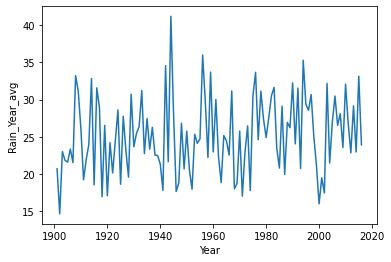

In [11]:
sns.lineplot(
    data=data, x="Year", y="Rain_Year_avg", 
)

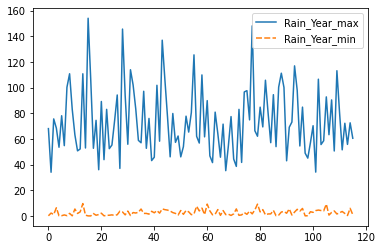

In [12]:
sns.lineplot(data=data[['Rain_Year_max', 'Rain_Year_min']])

**Looking at Average Annual Temperature over time**

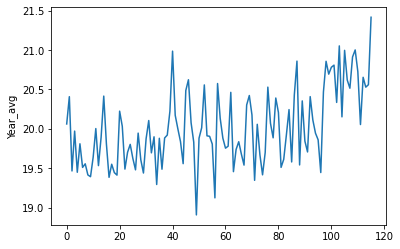

In [13]:
sns.lineplot(data=data['Year_avg'])

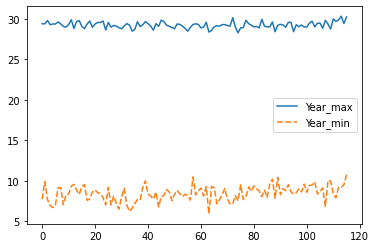

In [14]:
sns.lineplot(data=data[['Year_max', 'Year_min']])

In [15]:
#Drawing a simple graph of wheat output versus temperature

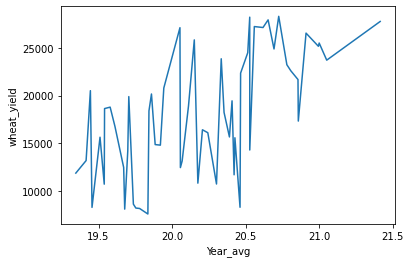

In [16]:
sns.lineplot(
    data=data, x="Year_avg", y="wheat_yield", 
) #As we can see here, this is no direct coorelation between the two.
#We will have to further analyze the wheat yeild paramters, as well as the temperature paramteres.

## Normalization and Standardization

In [35]:
data = data[data["Year_avg"].notna()]

In [36]:
X = data[data["wheat_yield"].notna()]


In [37]:
Y = data["wheat_yield"]
Y = Y[Y.notna()]
Y.head()

60    8222.0
61    8178.0
62    8303.0
63    8292.0
64    8631.0
Name: wheat_yield, dtype: float64

In [38]:
Y.reset_index()

,index,wheat_yield
0,60,8222.0
1,61,8178.0
2,62,8303.0
3,63,8292.0
4,64,8631.0
5,65,7597.0
6,66,8110.0
7,67,10727.0
8,68,10744.0
9,69,11710.0


In [39]:
X.drop(columns=['wheat_area_harvested','wheat_production', 'wheat_yield', 'temp_variance', 'Rain_rainfall_variance'], inplace=True)
X.reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,Year,Rain_Year_avg,Rain_Year_max,Rain_Year_min,Rain_Summer_avg,Rain_Summer_max,Rain_Summer_min,Rain_Winter_avg,Rain_Winter_max,Rain_Winter_min,Year_avg,Year_max,Year_min,Summer_avg,Summer_max,Summer_min,Winter_avg,Winter_max,Winter_min
0,60,1961,30.017449,89.9002,9.28469,53.228767,89.9002,23.48900,25.112733,89.9002,23.48900,19.753663,28.8716,9.09557,28.488167,28.8716,27.9087,9.338220,9.74896,9.09557
1,61,1962,22.300155,46.8747,4.00006,33.586067,46.8747,10.98280,15.948100,46.8747,10.98280,19.779221,28.9729,8.12009,28.482167,28.9729,27.7405,9.881450,12.19980,8.12009
2,62,1963,18.846562,41.6322,0.99773,17.918037,27.7805,5.55861,9.879377,27.7805,5.55861,20.461927,29.5692,9.27652,29.030133,29.5692,28.0886,11.028640,13.28630,9.27652
3,63,1964,25.169663,80.9339,1.39828,51.920433,80.9339,18.55880,24.127467,80.9339,18.55880,19.455764,28.3536,5.91348,28.249833,28.3536,28.1009,8.340190,10.63360,5.91348
4,64,1965,24.451258,64.3407,5.02491,33.465370,64.3407,5.02491,20.542033,64.3407,5.02491,19.736968,28.5565,9.28412,27.908933,28.5565,26.7583,10.209473,10.92270,9.28412
5,65,1966,22.548259,45.8264,0.55480,31.383100,45.8264,14.12810,16.550203,45.8264,14.12810,19.835458,29.0107,9.15590,28.323700,29.0107,27.5495,10.898300,13.29750,9.15590
6,66,1967,31.156436,71.5948,4.27492,47.388830,71.5948,8.45779,28.162273,71.5948,8.45779,19.678002,29.1326,7.16669,28.374000,29.1326,27.2929,9.674040,12.35150,7.16669
7,67,1968,18.005987,35.3530,1.11097,23.872267,35.3530,7.33590,23.160333,35.3530,7.33590,19.538937,29.0917,7.65180,28.499500,29.0917,27.5790,8.851150,10.23360,7.65180
8,68,1969,18.716057,54.8043,1.45074,27.990670,54.8043,9.63631,13.493947,54.8043,9.63631,20.301930,29.2691,8.29291,28.710467,29.2691,27.7145,9.934787,11.57260,8.29291
9,69,1970,25.773367,77.4600,0.47082,46.697133,77.4600,16.55790,20.588137,77.4600,16.55790,20.421614,29.2800,9.03377,28.890300,29.2800,28.6340,10.342857,11.43320,9.03377


In [40]:
X.isnull().values.sum()

0

In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
data_scaled = scaler.fit_transform(X)

## **Multi Linear Regressor**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, Y, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 1182.3560519720643
Mean Squared Error: 1915100.5287766687
Root Mean Squared Error: 1383.8715723565783
R squared score: 0.9754412607598218


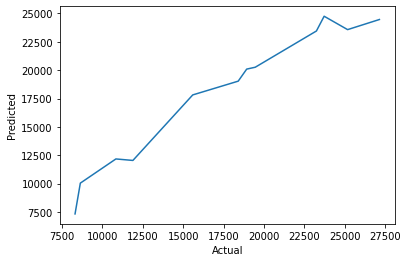

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.lineplot(
    data=df, x="Actual", y="Predicted", )

In [29]:
import pickle

In [30]:
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [31]:
X_test[0]

array([ 0.63636364,  0.58553259,  0.64383831,  2.01208064,  0.49472728,
        0.57906251,  0.24487637,  0.92686231,  0.57906251,  0.24487637,
        1.02227734,  0.53860456, -0.06285231, -0.12309364,  0.53860456,
       -0.51511992,  0.98759971,  2.78035583, -0.06285231])

In [32]:
array = [2020, 31.63, 105.78, 0.92442, 59.437, 105.78, 13.962, 18.51, 105.7, 13.96, 19, 28, 8, 28.54, 28.86, 28.03, 9.61, 10, 8.75]

In [33]:
scalerpred = RobustScaler() 
data_pred = scalerpred.fit_transform([array])

In [34]:
regressor.predict(data_pred)

array([18155.63479391])

## **Support Vector Regressor**

In [42]:
from sklearn.svm import SVR

### **Hyperparamter Tuning -- Grid Search**

In [43]:
from sklearn.model_selection import GridSearchCV


 > Hyperparamteres to be fine tuned:
1.   Regulisation paramter C
2.   Kernel function (linear, poly, rbf, sigmoid and precomputed values)


In [44]:
parameters = {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }

In [45]:
gsc = GridSearchCV(
        estimator=SVR(),
        param_grid=parameters,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [51]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_scaled, Y, test_size=0.2, random_state=0)

In [52]:
gsc.fit(X_train1, y_train1)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [53]:
print(gsc.best_params_)

{'C': 1000, 'epsilon': 0.0005, 'gamma': 0.0001, 'kernel': 'linear'}


### **Implementing SVR**

In [54]:
SVregressor = SVR(C = 1000, epsilon=0.005, gamma=0.0001, kernel='linear')

In [55]:
SVregressor.fit(X_train1, y_train1)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.005, gamma=0.0001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
y_pred1 = SVregressor.predict(X_test)

In [57]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print('R squared score:', np.sqrt(metrics.r2_score(y_test1, y_pred1)))

Mean Absolute Error: 1150.5516614833384
Mean Squared Error: 2003161.593553774
Root Mean Squared Error: 1415.3309130919786
R squared score: 0.9742971022167152


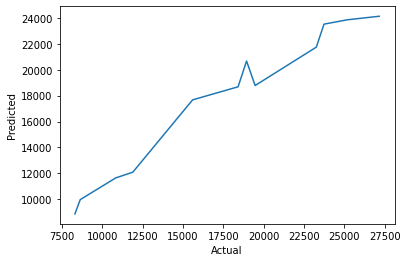

In [58]:
df = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
sns.lineplot(
    data=df, x="Actual", y="Predicted", )

In [59]:
SVregressor.predict(data_pred)

array([18007.78004753])

## **Random Forest Regressor**

In [65]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
RFregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(data_scaled, Y, test_size=0.2, random_state=0)
# fit the regressor with x and y data
RFregressor.fit(X_train2, y_train2)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [66]:
y_pred2 = RFregressor.predict(X_test2)

In [67]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('R squared score:', np.sqrt(metrics.r2_score(y_test2, y_pred2)))

Mean Absolute Error: 976.8791666666663
Mean Squared Error: 1554045.0382083328
Root Mean Squared Error: 1246.6134277346498
R squared score: 0.9801184128569681


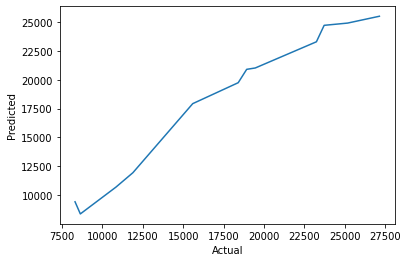

In [68]:
df = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
sns.lineplot(
    data=df, x="Actual", y="Predicted", )

In [69]:
RFregressor.predict(data_pred)

array([18103.8])